<a href="https://colab.research.google.com/github/Ezraliano/Data_Science_Projects/blob/main/Analysis_House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
warnings.simplefilter(action='ignore', category=FutureWarning)

Loading Data

In [65]:
df_analis = pd.read_csv('House Price Prediction Dataset.csv')

In [66]:
df_analis.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


Data Preprocessing

In [67]:
df_analis.shape

(2000, 10)

In [68]:
df_analis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [69]:
# Melihat missing value
df_analis.isnull().sum()

,0
Id,0
Area,0
Bedrooms,0
Bathrooms,0
Floors,0
YearBuilt,0
Location,0
Condition,0
Garage,0
Price,0


EDA

In [70]:
# Mencari korelasi harga
corelation_matrix = df_analis.select_dtypes(include=['int64']).corr()
print(corelation_matrix['Price'].sort_values(ascending=False))


Price        1.000000
Floors       0.055890
YearBuilt    0.004845
Area         0.001542
Bedrooms    -0.003471
Bathrooms   -0.015737
Id          -0.025643
Name: Price, dtype: float64


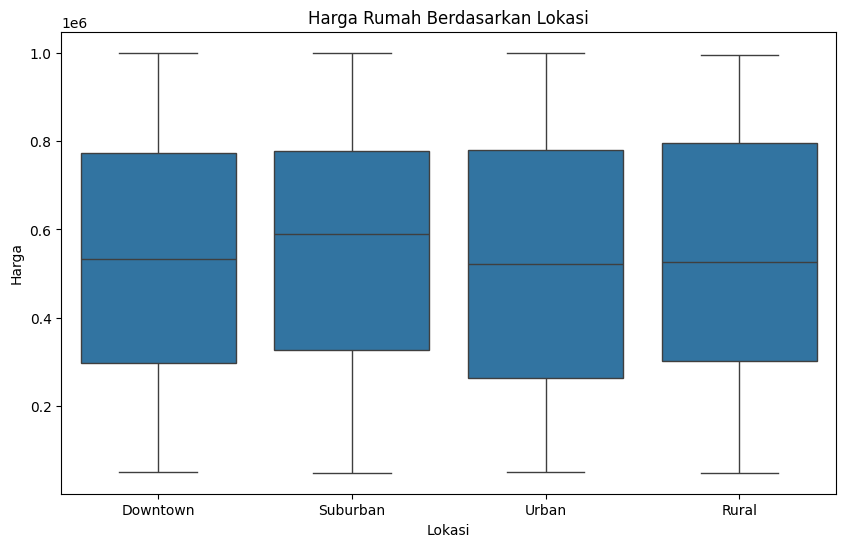

In [71]:

# Plot boxplot untuk 'Location' vs 'Price'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_analis, x='Location', y='Price')
plt.title('Harga Rumah Berdasarkan Lokasi')
plt.xlabel('Lokasi')
plt.ylabel('Harga')
plt.show()


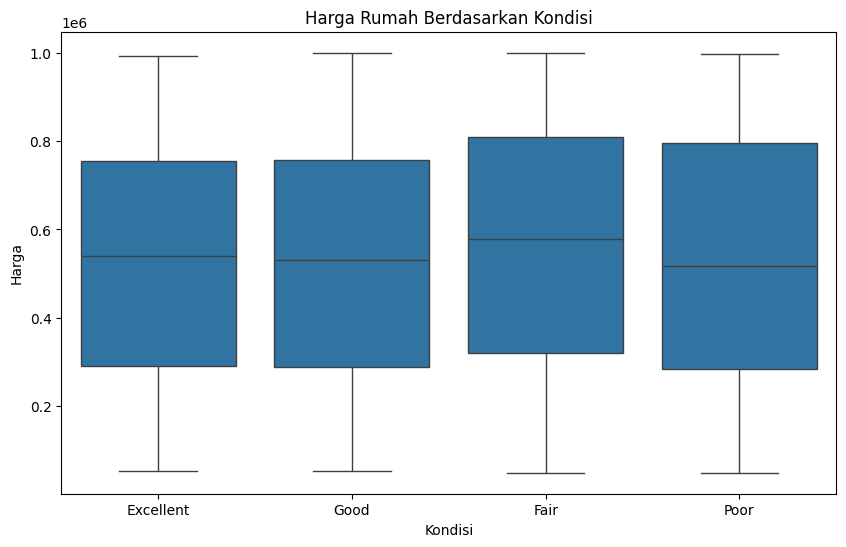

In [72]:
# Plot boxplot untuk 'Condition' vs 'Price'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_analis, x='Condition', y='Price')
plt.title('Harga Rumah Berdasarkan Kondisi')
plt.xlabel('Kondisi')
plt.ylabel('Harga')
plt.show()


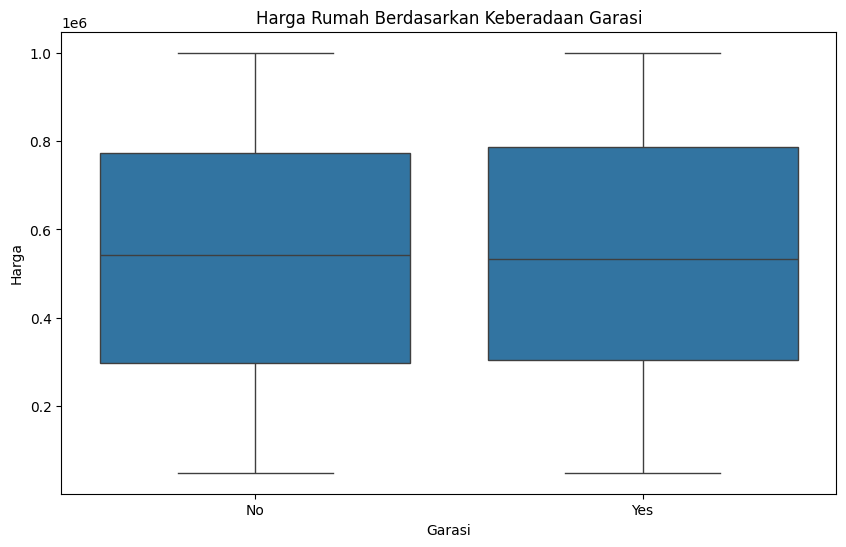

In [73]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_analis, x='Garage', y='Price')
plt.title('Harga Rumah Berdasarkan Keberadaan Garasi')
plt.xlabel('Garasi')
plt.ylabel('Harga')
plt.show()

Model Regresi

In [74]:
# Memilih fitur dan target yang akan di train dan test
X = df_analis[['Area', 'Bedrooms', 'Bathrooms', 'Floors']]
y = df_analis['Price']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
# Membangun Model Linear Regresion
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [77]:
# Membuat model prediksi
predicted_price = model.predict(X_test)

# Menghitung Residual
residual = y_test - predicted_price



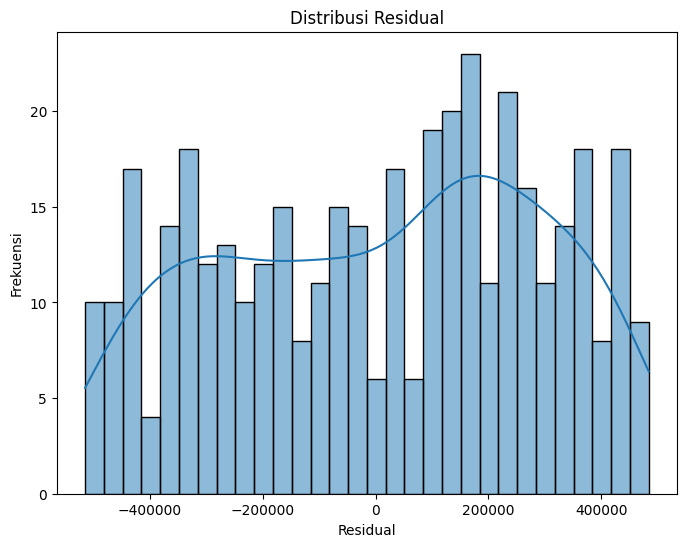

In [78]:
plt.figure(figsize=(8, 6))
sns.histplot(residual, bins=30, kde=True)
plt.title('Distribusi Residual')
plt.xlabel('Residual')
plt.ylabel('Frekuensi')
plt.show()

In [79]:
#Menambah file csv
df_analis.to_csv('House_Price_analysis.csv', index=True)


Menambahkan Analisa Clustering


In [80]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_analis[['Area', 'Bedrooms', 'Bathrooms', 'Floors']])

In [81]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, random_state=42)

In [82]:
df_analis['Cluster'] = kmeans.predict(df_scaled)
df_analis.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price,Cluster
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919,1
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998,1
2,3,3592,2,2,3,1938,Downtown,Good,No,266746,0
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020,2
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056,1


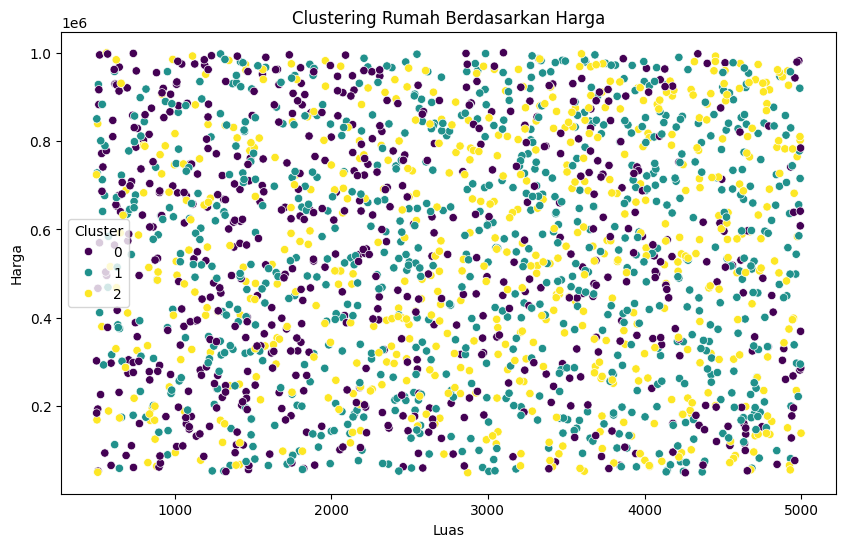

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_analis, x='Area', y='Price', hue='Cluster', palette='viridis')
plt.title('Clustering Rumah Berdasarkan Harga')
plt.xlabel('Luas')
plt.ylabel('Harga')
plt.show()

In [ ]:
df_analis.to_csv('House_Price_analysis.csv', index=False)